# Домашнее задание 2. Нейронные сети
## Першаев Никита ИУ8-83

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача классификации</th>
            <th colspan=5>Задача регрессии</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th>C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td>L</td>
            <td>6</td>
            <td>7</td>
            <td>8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача регрессии**

E. [Набор данных](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) Объединить таблицы `winequality-white.csv` и `winequality-red.csv`. Задача: построить модель, предсказывающую качество вина (колонка `quality`). Baseline: RMSE (root mean square error) = 0.8

# 0. Инициализация библиотек

In [2]:
import pandas as pd
import torch
import math
import matplotlib.pyplot as plt

from torch import nn
from torch.nn import functional
from sklearn.model_selection import train_test_split

# 1. Искусственная нейронная сеть для решения задачи регрессии (9 баллов)

## 1.1 Загрузите данные, поделить на train и test



In [3]:
# Import data
redWine = pd.read_csv('../data/winequality-red.csv', sep=";")
whiteWine = pd.read_csv('../data/winequality-white.csv', sep=";")
# Join tables
wineQuality = pd.concat([redWine, whiteWine], ignore_index=True, sort=False)

## 1.2 По необходимости проведите преодбработку/нормализацию данных

In [4]:
train, test = train_test_split(pd.get_dummies(wineQuality), train_size=0.8, random_state=80)
droppedTrain = train.drop(columns='quality')
trainQuality = train.quality
droppedTest = test.drop(columns='quality')
testQuality = test.quality

## 1.3 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=линейная регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое функцию активации можно не использовать.

Постройте: 1) график loss для train и test в зависимости от используемого количетсва слоёв; 2) график accuracy для train и test в зависимости от используемого количества слоёв.

In [5]:
def generateLayers(numLayers, activationFunc= None):
    layers = []
    for layer in range(numLayers):
        if layer == numLayers - 1:
            layers.append(nn.Linear(11, 1))
        else:
            layers.append(nn.Linear(11, 11))
            layers.append(activationFunc)
    
    return layers

def getLoss(droppedValues, values, model):
    predict = model.forward(torch.FloatTensor(droppedValues))[:,0]
    loss = functional.mse_loss(predict, torch.FloatTensor(values))

    return loss

def train(model, optimizer, epochs):
    lossValues = []
    for i in range(epochs):
        optimizer.zero_grad()
        model.train()

        loss = getLoss(droppedTrain.values, trainQuality.values, model)

        loss.backward()
        optimizer.step()

        lossValues.append(math.sqrt(loss.item()))

        plt.yscale('log')
        plt.plot(lossValues)
    
    plt.show()

def test(model):
    loss = getLoss(droppedTest.values, testQuality.values, model)

    print(f'loss: {math.sqrt(loss.item())}')

def trainAndTestModel(model, optimizer, epochs=1000):
    train(model, optimizer, epochs)
    test(model)

1 layers:


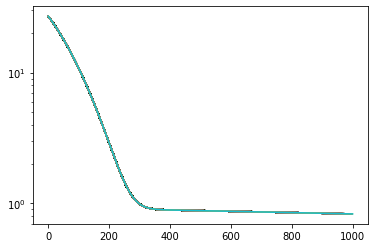

loss: 0.840656437339179
2 layers:


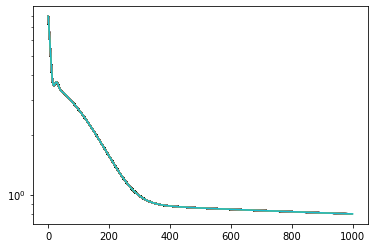

loss: 0.8046956108203001
3 layers:


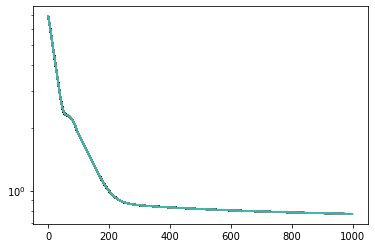

loss: 0.7776996813651442
4 layers:


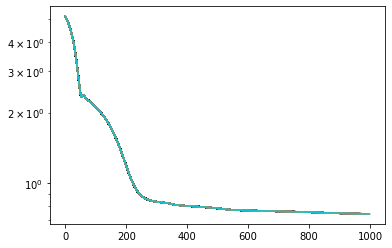

loss: 0.7479471483810823


In [6]:
layers = 4
for i in range(layers):
    numLayers = i + 1
    print(f'{numLayers} layers:')
    layers = generateLayers(numLayers, nn.ReLU())
    model = nn.Sequential(*layers)

    trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

## 1.4 Попробуйте различные функции активации

Обучите 4 модели, используя 4 различных функции активации: sigmoid, tanh, ReLU, ELU. 

Постройте: 1) график loss для train и test в зависимости от используемой функции активации; 2) график accuracy для train и test в зависимости от используемой функции активации;

### ReLU

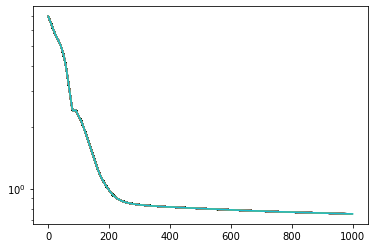

loss: 0.7594663918212172


In [72]:
layers = generateLayers(4, nn.ReLU())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

### ELU

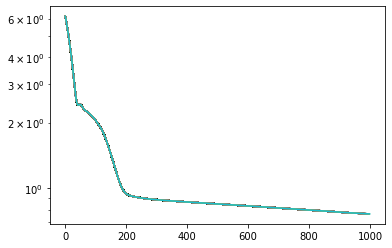

loss: 0.769826570957553


In [73]:
layers = generateLayers(4, nn.ELU())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

### sigmoid

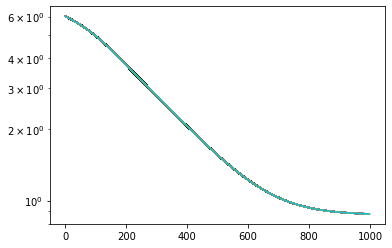

loss: 0.8894296622082086


In [79]:
layers = generateLayers(4, nn.Sigmoid())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

### tanh

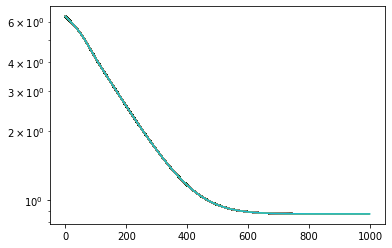

loss: 0.879169238269052


In [80]:
layers = generateLayers(4, nn.Tanh())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

## 1.5 Попробуйте различные алгоритмы оптимизации

Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: 1) график loss для train и test в зависимости от используемого  алгоритма оптимизации; 2) график accuracy для train и test в зависимости от используемого  алгоритма оптимизации.

### Adam

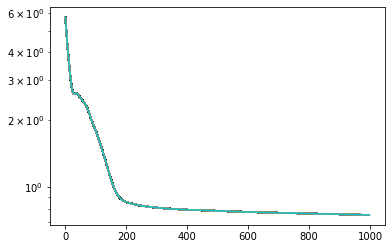

loss: 0.7597945729994949


In [81]:
layers = generateLayers(4, nn.ReLU())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

### RMSprop

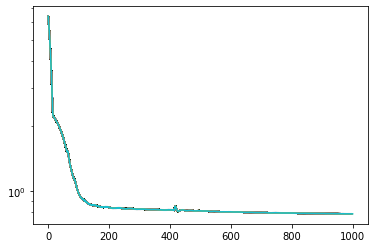

loss: 0.7873237639727723


In [87]:
layers = generateLayers(4, nn.ReLU())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.RMSprop(model.parameters(), lr=0.001))

### SGD

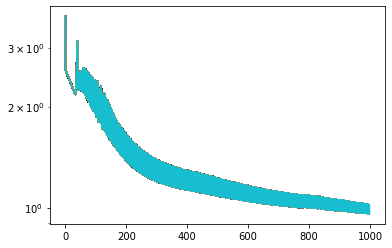

loss: 1.0413445101706782


In [90]:
layers = generateLayers(4, nn.ReLU())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.SGD(model.parameters(), lr=0.001))

### SGD with momentum

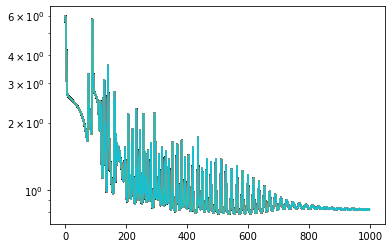

loss: 0.8385449324518586


In [92]:
layers = generateLayers(4, nn.ReLU())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.4))

## 1.6 Попробуйте добавить dropout и batch norm

Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: 1) график loss для train и test в зависимости от используемой конфигурации; 2) график accuracy для train и test в зависимости от используемой конфигурации.

In [96]:
def generateLayersWithDBN(numLayers, activationFunc= None, batchNorm=11, dropout=0):
    layers = []
    for layer in range(numLayers):
        if layer == numLayers - 1:
            layers.append(nn.Linear(11, 1))
        else:
            layers.append(nn.Linear(11, 11))
            if batchNorm:
                layers.append(nn.BatchNorm1d(batchNorm))
            if dropout:
                layers.append(nn.Dropout(p=dropout))
            layers.append(activationFunc)
    
    return layers

### With BatchNorm

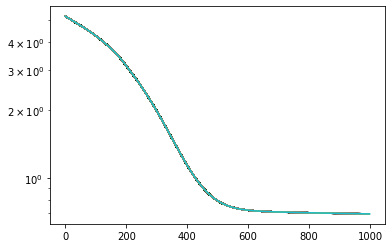

loss: 0.7197081771841877


In [99]:
layers = generateLayersWithDBN(numLayers, nn.ReLU())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

### With dropout = 0.2

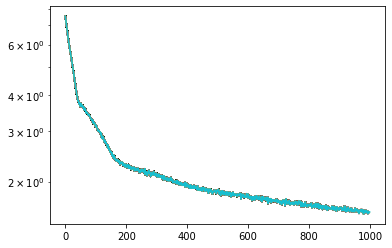

loss: 1.5208734306728042


In [110]:
layers = generateLayersWithDBN(numLayers, nn.ReLU(), 0, 0.2)
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

### With dropout = 0.5

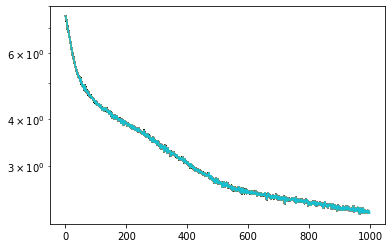

loss: 2.3328673942019647


In [113]:
layers = generateLayersWithDBN(numLayers, nn.ReLU(), 0, 0.5)
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

### With batchnorm and dropout = 0.2

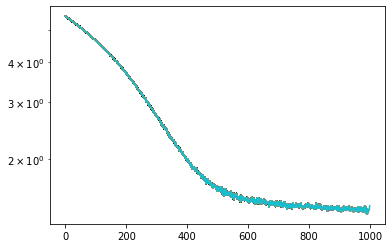

loss: 1.4189890823912052


In [117]:
layers = generateLayersWithDBN(numLayers, nn.ReLU(), dropout=0.2)
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

### With batchnorm and dropout = 0.5

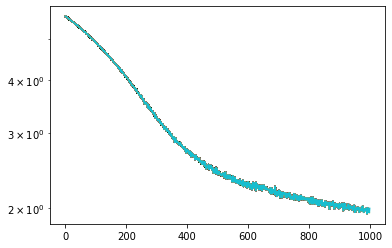

loss: 2.0228078444256563


In [119]:
layers = generateLayersWithDBN(numLayers, nn.ReLU(), dropout=0.5)
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

## 1.7 Постройте финальную модель

Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

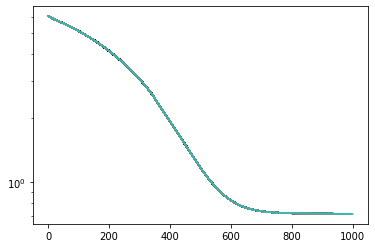

loss: 0.7382088277505461


In [120]:
layers = generateLayersWithDBN(numLayers, nn.ReLU())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

## 1.8 Выводы

4-ех слойная модель с алгоритмом оптимизации Adam, функцией активацией ReLU и добавлением BatchNorm показала самую высокую точность:
```
loss: 0.7382088277505461 
```